### Exploratory Data Analysis Part I

#### Pandas, Matplotlib, and MySQL Connector Imports 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

#### Connect to remote data source


In [2]:
exploratory_db = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database = "salesdb", user= "root", password = "D3v$tudent", use_pure = True)

#### Query database to JOIN the information from the sales and cities tables together saved in a DataFrame variable

In [3]:
#my_query = ("SELECT * FROM salesdb.cities INNER JOIN salesdb.sales on cities.City_ID = sales.City_ID")
my_query = ("SELECT * FROM salesdb.sales JOIN cities USING (City_ID)")
connected_df = pd.read_sql(my_query, exploratory_db)
connected_df.head()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_46416\1851918885.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  connected_df = pd.read_sql(my_query, exploratory_db)


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


#### Clean and Wrangle Data - check for null and duplicate values; convert any necessary columns to Pandas DateTime format

In [4]:
connected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City_ID        1000 non-null   int64  
 1   Invoice_ID     1000 non-null   object 
 2   Customer_Type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product_Line   1000 non-null   object 
 5   Unit_Price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Sales_Tax      0 non-null      object 
 8   Total          1000 non-null   float64
 9   Date           1000 non-null   object 
 10  Time           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  COGS           1000 non-null   float64
 13  Gross_Income   1000 non-null   float64
 14  Rating         1000 non-null   float64
 15  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 125.1+ KB


In [5]:
non_null_df = connected_df.dropna(axis=1)
non_null_df.info()
non_null_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City_ID        1000 non-null   int64  
 1   Invoice_ID     1000 non-null   object 
 2   Customer_Type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product_Line   1000 non-null   object 
 5   Unit_Price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  COGS           1000 non-null   float64
 12  Gross_Income   1000 non-null   float64
 13  Rating         1000 non-null   float64
 14  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 117.3+ KB


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


In [6]:
non_null_df.duplicated().sort_values()
#no dupes 

0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

In [7]:
non_null_df["Date"] = pd.to_datetime(non_null_df["Date"])
non_null_df.head()


C:\Users\Andrea\AppData\Local\Temp\ipykernel_46416\3848066219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null_df["Date"] = pd.to_datetime(non_null_df["Date"])


,City_ID,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
0,1,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,3,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,3,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,1,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,12:22,Ewallet,42.96,2.1480,6.6,Seattle


####  Exploring the DataFrame
##### 1. How many sales were made for members vs. normal customers?
        There were 2 more member customers than there were normal customers
##### 2. How many sales were made at each store location?
        (1) Seattle = 106,200.37
        (2) New York = 106,197.67
        (3) Milwaukee = 110,568.70
##### 3. How many sales were made for each product line?
        Fashion accessories = 178
        Food and beverages = 174
        Electronic accessories = 170
        Sports and travel = 166
        Home and lifestyle = 160
        Health and beauty = 152
##### 4. What is the overall average rating, based on all sales records?
        Average rating = 6.97


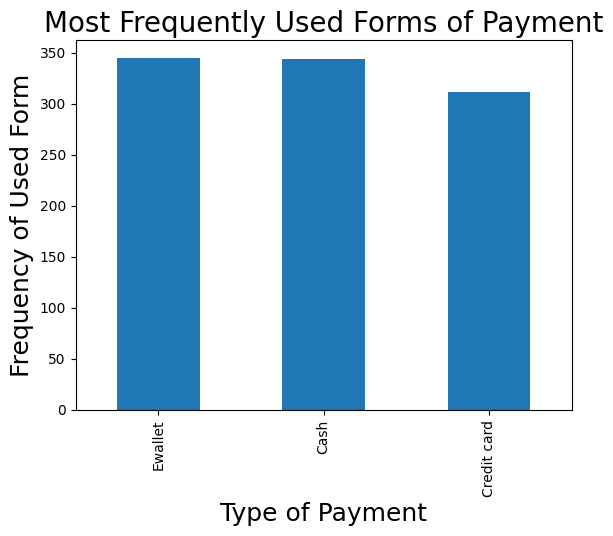

In [8]:
payment_types = non_null_df["Payment"].value_counts()
my_plot = payment_types.plot.bar()
plt.title("Most Frequently Used Forms of Payment", fontsize=20)
plt.xlabel("Type of Payment", fontsize = 18)
plt.ylabel("Frequency of Used Form", fontsize=18);


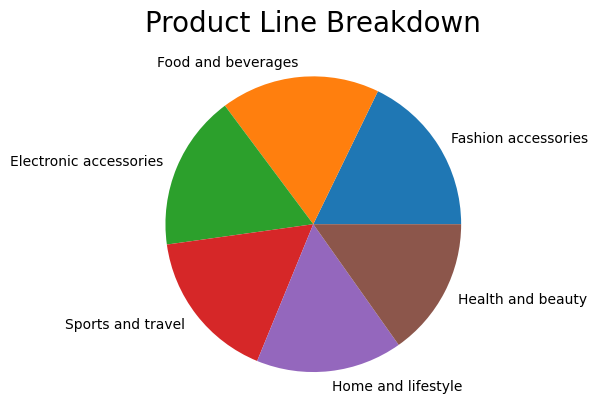

In [9]:
product_line_counts = non_null_df["Product_Line"].value_counts()
fig, ax = plt.subplots(facecolor="white")
my_pie_plot = product_line_counts.plot.pie()
plt.ylabel('')
plt.title("Product Line Breakdown", fontsize=20);

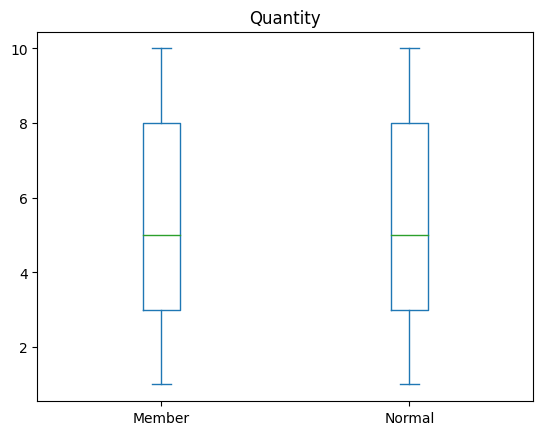

In [10]:
box_plot = non_null_df.plot.box(column=["Quantity"], by="Customer_Type");

### Exploratory Data Part II

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
non_null_df.describe()

,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,1.988000,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,0.817633,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,1.000000,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,1.000000,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,2.000000,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,3.000000,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,3.000000,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


In [13]:
non_null_df.corr()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_46416\586792939.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  non_null_df.corr()


,City_ID,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
City_ID,1.000000,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238
Unit_Price,0.028202,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.015964,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.041047,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,0.010238,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


#### Columns with the strongest correlation, visualize those two columns using a Matplotlib Scatter Plot.  

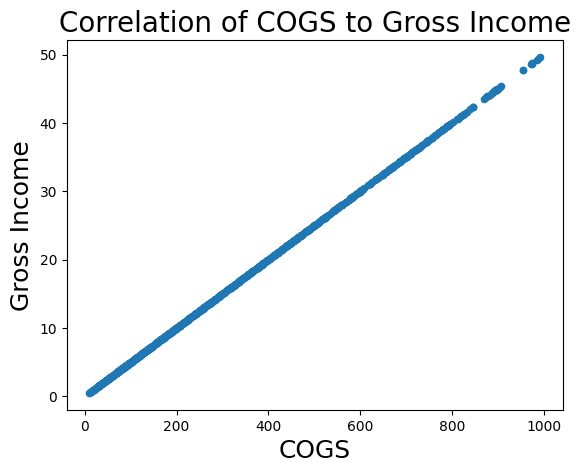

In [14]:
scatter_plot = non_null_df.plot.scatter(x = "COGS", y = "Gross_Income")
plt.title("Correlation of COGS to Gross Income", fontsize=20)
plt.xlabel("COGS", fontsize = 18)
plt.ylabel("Gross Income", fontsize=18);

#### Reshape the two columns to prepare for fitting to a linear regression model and save each as its own unique variable.


In [15]:
reshaped_x = non_null_df[["COGS"]]
reshaped_y = non_null_df["Gross_Income"]

#### Create a new LinearRegression instance and use the appropriate function to create a predictive model for the Y-axis values.

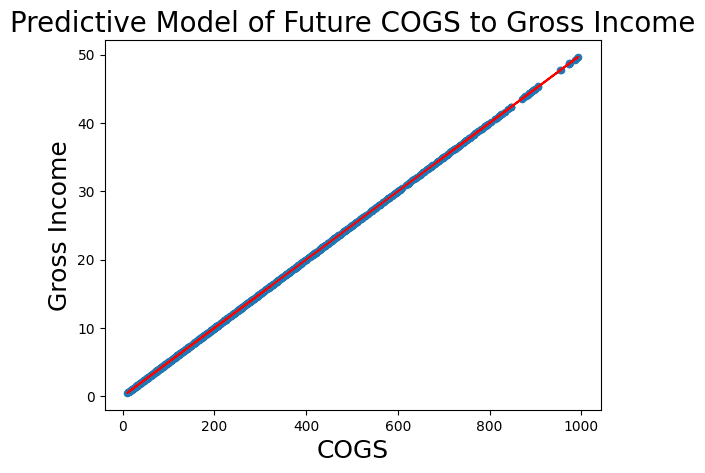

In [16]:
linear_regressor = LinearRegression()
linear_regressor.fit(reshaped_x, reshaped_y)
y_prediction = linear_regressor.predict(reshaped_x)

non_null_df.plot.scatter (x = "COGS", y = "Gross_Income")
plt.plot (reshaped_x, y_prediction, color="red");

plt.title("Predictive Model of Future COGS to Gross Income", fontsize=20)
plt.xlabel("COGS", fontsize = 18)
plt.ylabel("Gross Income", fontsize=18);